In [1]:
from langchain_community.tools import WikipediaQueryRun


In [2]:
from langchain_community.utilities import WikipediaAPIWrapper

In [3]:
api_wrapper = WikipediaAPIWrapper(top_k_results=5,doc_content_chars_max=500)

In [4]:
wikitool=WikipediaQueryRun(
    api_wrapper=api_wrapper)

In [5]:
wikitool.args

{'query': {'description': 'query to look up on wikipedia',
  'title': 'Query',
  'type': 'string'}}

In [6]:
wikitool.run("What is LangChain?")

'Page: Milvus (vector database)\nSummary: Milvus is a distributed vector database developed by Zilliz. It is available as both open-source software and a cloud service.\nMilvus is an open-source project under LF AI & Data Foundation distributed under the Apache License 2.0.\n\nPage: Markov chain\nSummary: In probability theory and statistics, a Markov chain or Markov process is a stochastic process describing a sequence of possible events in which the probability of each event depends only on the stat'

In [7]:
from langchain_community.tools import YouTubeSearchTool

In [8]:
Youtube_Tool = YouTubeSearchTool()

In [9]:
Youtube_Tool.args

{'query': {'title': 'Query', 'type': 'string'}}

In [10]:
Youtube_Tool.run("What is LangChain?")

"['https://www.youtube.com/watch?v=1bUy-1hGZpI&pp=ygUSV2hhdCBpcyBMYW5nQ2hhaW4_', 'https://www.youtube.com/watch?v=3PM4A8OM7I8&pp=ygUSV2hhdCBpcyBMYW5nQ2hhaW4_']"

In [11]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [12]:
os.environ['TAVILY_API_KEY']=os.getenv("TAVILY_API_KEY")

In [13]:
from langchain_community.tools.tavily_search import TavilySearchResults
tavily_search = TavilySearchResults()

In [14]:
tavily_search.args

{'query': {'description': 'search query to look up',
  'title': 'Query',
  'type': 'string'}}

In [15]:
tavily_search.args
tavily_search.run({'query': 'What is Stock price of NSE:KOTAKBANK?'})

[{'title': 'Kotak Mahindra Bank Stock Price Today | NSE: KTKM Live',
  'url': 'https://www.investing.com/equities/kotak-mahindra-bank',
  'content': '[-](https://www.investing.com/pro/NSEI:KOTAKBANK/explorer/gp_margin)\n\nPrice/Book\n\n[2.62](https://www.investing.com/pro/NSEI:KOTAKBANK/explorer/price_to_book)\n\nEBITDA\n\n[-](https://www.investing.com/pro/NSEI:KOTAKBANK/explorer/ebitda)\n\nEV/EBITDA\n\n[-](https://www.investing.com/pro/NSEI:KOTAKBANK/explorer/ev_to_ebitda_ltm)\n\nBeta\n\n[0.42](https://www.investing.com/pro/NSEI:KOTAKBANK/explorer/beta "Beta")\n\nBook Value / Share\n\n[792.11](https://www.investing.com/pro/NSEI:KOTAKBANK/explorer/bv_share) [...] Book Value / Share\n\n[792.11](https://www.investing.com/pro/NSEI:KOTAKBANK/explorer/bv_share)\n\nISIN INE237A01028\n\n[More metrics for KTKM](https://www.investing.com/pro/NSEI:KOTAKBANK/explorer)\n\nShow More\n\nBid/Ask 2,077.30 / 2,078.90\n\nPrev. Close\n\n2,081.6\n\nOpen\n\n2,081.6\n\nDay\'s Range 2,065.5-2,090.2\n\n52 wk 

In [34]:
from langchain.document_loaders import GoogleDriveLoader
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build

In [35]:
file_id = ["1aucrY3etlqCMSxYLCPgk8RVEX7CKF7gOcyeDB44oQZQ"] 

In [42]:
# Define the scopes
SCOPES = ['https://www.googleapis.com/auth/drive.readonly']

# Authenticate and create the API client
flow = InstalledAppFlow.from_client_secrets_file(
    "c:\\Users\\MSE226\\Desktop\\Krish_agenticai_prac\\credentials.json", SCOPES)
creds = flow.run_local_server(port=0)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=205321969930-tk5n9l4edmdmp1ssbihmd85iqe84k0c9.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A55234%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.readonly&state=Nl9RoIQAbyiFazYFkkQY9lFWNlE4mY&access_type=offline


In [48]:
loader = GoogleDriveLoader(
    credentials_path="c:\\Users\\MSE226\\Desktop\\Krish_agenticai_prac\\credentials.json",
    token_path="token.json",
    folder_id="1lP5vNh1ycU36AKItJZsgPERaz9qvYrVQ",
    # file_ids=["1aucrY3etlqCMSxYLCPgk8RVEX7CKF7gOcyeDB44oQZQ"],
    file_types=['application/vnd.google-apps.spreadsheet'],
    recursive=True,
    show_progress=True
)

In [49]:
docs = loader.load()

HttpError: <HttpError 429 when requesting https://sheets.googleapis.com/v4/spreadsheets/1IFSv3PZJymgpYUWpIdpuSwBczrn2BkVVJONP6d1n9K0/values/XIRR?alt=json returned "Quota exceeded for quota metric 'Read requests' and limit 'Read requests per minute per user' of service 'sheets.googleapis.com' for consumer 'project_number:205321969930'.". Details: "[{'@type': 'type.googleapis.com/google.rpc.ErrorInfo', 'reason': 'RATE_LIMIT_EXCEEDED', 'domain': 'googleapis.com', 'metadata': {'quota_location': 'global', 'quota_limit': 'ReadRequestsPerMinutePerUser', 'consumer': 'projects/205321969930', 'quota_metric': 'sheets.googleapis.com/read_requests', 'quota_limit_value': '60', 'quota_unit': '1/min/{project}/{user}', 'service': 'sheets.googleapis.com'}}, {'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Request a higher quota limit.', 'url': 'https://cloud.google.com/docs/quotas/help/request_increase'}]}]">

In [39]:
print(docs)

[]


In [51]:
from langchain.agents import tool

In [52]:
@tool
def multiply_numbers(a: int, b: int) -> int:
    """Multiplies two numbers."""
    return a * b

In [57]:
multiply_numbers.invoke({"a":3, "b":4})  # Example usage of the tool

12

In [58]:
multiply_numbers.args

{'a': {'title': 'A', 'type': 'integer'},
 'b': {'title': 'B', 'type': 'integer'}}

In [59]:
multiply_numbers.description

'Multiplies two numbers.'

In [60]:
@tool
def get_word_length(word: str) -> int:
    """Returns the length of the given word."""
    return len(word)

In [61]:
get_word_length.invoke({"word": "hello"})  # Example usage of the tool

5

In [64]:
get_word_length.args
# get_word_length.description

{'word': {'title': 'Word', 'type': 'string'}}

In [62]:
get_word_length.invoke("Mukesh Kumar Jain Sethi")  # Example usage of the tool

23

In [72]:
def function_1(input1):
    """This function takes an input and returns it."""
    return input1 + ' ' +  "from the First Function"

In [75]:
def function_2(input2):
    """This function takes an input and returns it."""
    return input2 + ' ' + "from the Second Function"

In [106]:
def function_3(input3):
    """This function takes an input and returns it."""
    return input3 + ' ' + "from the Third Function"

In [107]:
function_1('Mukesh')

'Mukesh from the First Function'

In [108]:
function_2('Mukesh')

'Mukesh from the Second Function'

In [109]:
from langgraph.graph import  Graph

In [110]:
workflow1 = Graph()

In [111]:
workflow1.add_node("func1",function_1)


In [112]:
workflow1.add_node("func2",function_2)


In [113]:
workflow1.add_node("func3",function_3)

In [114]:
workflow1.add_edge("func1", "func2")
workflow1.add_edge("func2", "func3")

In [115]:
workflow1.set_entry_point("func1")

In [116]:
workflow1.set_finish_point("func3")

In [117]:
app = workflow1.compile()


In [118]:
from IPython.display import display, Image

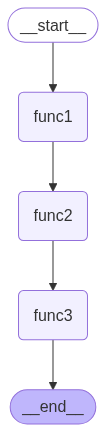

In [119]:
display(Image(app.get_graph().draw_mermaid_png(), width=200, height=600))

In [120]:
app.invoke("Hello")

'Hello from the First Function from the Second Function from the Third Function'

In [121]:
app.invoke("hi this is sunny")

'hi this is sunny from the First Function from the Second Function from the Third Function'

In [122]:
for output in app.stream("hi this is rohit"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")
    

here is output from func1
_______
hi this is rohit from the First Function


here is output from func2
_______
hi this is rohit from the First Function from the Second Function


here is output from func3
_______
hi this is rohit from the First Function from the Second Function from the Third Function




In [129]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [130]:
os.environ['GOOGLE_API_KEY']=os.getenv("GOOGLE_API_KEY")

In [131]:
from langchain_google_genai import ChatGoogleGenerativeAI
model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')

In [132]:
model.invoke("hi").content

'Hi there! How can I help you today?'

In [133]:
def llm(input):
    """This function takes an input and returns it."""
    from langchain_google_genai import ChatGoogleGenerativeAI
    model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
    return model.invoke(input).content

In [134]:
def token_counter(input):
    token=input.split()
    token_number=len(token)
    return f"total token number in the generated answer is {token_number}"

In [135]:
workflow2=Graph()

In [136]:
workflow2.add_node("My_LLM",llm)

In [137]:
workflow2.add_node("count_token",token_counter)

In [138]:
workflow2.add_edge("My_LLM","count_token")

In [139]:
workflow2.set_entry_point("My_LLM")

In [140]:
workflow2.set_finish_point("count_token")

In [141]:
app=workflow2.compile()

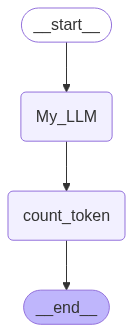

In [142]:
display(Image(app.get_graph().draw_mermaid_png()))

In [146]:
app.invoke("can you tell me about the india's capital?")

'total token number in the generated answer is 83'

In [147]:
for output in app.stream("can you tell me about the india's capital?"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from My_LLM
_______
India's capital is **New Delhi**.  It's important to note that while New Delhi is the capital, it's actually a part of a larger metropolitan area called Delhi.  Delhi is a union territory, meaning it's directly governed by the central government, unlike the states of India.  New Delhi itself is the seat of the national government, housing Parliament, the President's residence, and numerous other important government buildings and ministries.


here is output from count_token
_______
total token number in the generated answer is 68


